<a href="https://colab.research.google.com/github/BeBrave-BeHumble/Machine_Learning/blob/main/ADP/Chapter_6_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1. 단순 선형 회귀(Simple Linear Regression)

## 1.개념

선형 회귀는 입력 특성에 대한 선형함수를 만들어 예측하는 알고리즘이다. 선형 회귀 모델은 입력 특성의 가중치 합(x*β1)과 절편(편향 β0)을 더해 예측을 수행한다.

선형 회귀 모델을 이용해 train set에 가장 적합하도록 모델 파라미터를 설정하는 과정을 '모델을 학습시킨다'고 한다. 널리 사용되는 성능평가지표는 MSE이며, 이를 최소로 하는 파라미터를 찾아야 한다.

이 과정에서 통계적 방식의 회귀분석과 머신러닝 모델은 MSE값을 최소화하는 파라미터를 찾는다는 목표가 같지만, 문제해결을 위한 접근방식이 다르다. 통계적 방식에서는 정규방적식을 사용하며, 머신러닝에서는 경사하강법을 사용한다.

## 2.정규방정식

정규방정식  β= (X'X)^(-1)X'y 을 사용하면 MSE를 최소로 하는 파라미터를 바로 얻을 수 있다. Least Squares Method(최소자승법)를 코드로 구현하거나, sklearn 패키지를 이용한다.

(1) scikit-learn의 LinearRegression

scikit-learn 패키지로 선형회귀 모델을 학습할 수 있다. scikit-learn의 linear_model의 여러 함수 중, LinearRegression은 최소자승법을 사용한 OLS(Ordinary Least Squares) 방식으로 선형 모델을 구현한다.

즉, 계수 w = (w1, ... ,wp)를 사용해 선형 모델을 피팅하여 데아터세트에 관찰된 대상과 선형 근사에 의해 예측된 대상 간의 잔차제곱합을 최소화한다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


나이와 의료비용 사이의 선형 모델을 생성하기에 앞서, 두 데이터 사이의 선형성을 확인해보아야 한다. 산점도를 이용해 두 값에서 선형성이 발견되는지 확인한다.

나이와 의료비용 사이에 선형성이 발견되며, 우상향하는 추세를 확인할 수 있다.

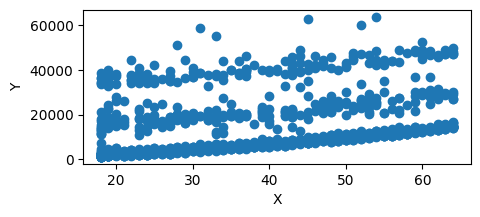

In [ ]:
x = data['age']
y = data['charges']

plt.figure(figsize = (5,2))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
x = np.array(data['age']) # (1338,) -> 1차원 벡터
y = np.array(data['charges']) # (1338,)
print(x)
print('='*56)
x = x.reshape(1338, 1) # fit에는 2차원 배열만 들어가므로 reshape. dataframe도 가능
y = y.reshape(1338, 1) # -> 2차원 행렬
print(x)

[19 18 28 ... 18 21 61]
[[19]
 [18]
 [28]
 ...
 [18]
 [21]
 [61]]


In [ ]:
lr = LinearRegression()
lr.fit(x, y)
print("선형회귀모델 결과")
print("절편:", np.round(lr.intercept_, 3), ", 계수:", np.round(lr.coef_, 3))

선형회귀모델 결과
절편: [3165.885] , 계수: [[257.723]]


In [ ]:
# 결정계수

print(lr.score(x, y)) # 8%로 설명력 매우 낮다

0.08940589967885804


새로운 데이터를 선형회귀모델에 입력한 뒤 나이에 따른 의료비용을 예측해보자.

19살은 8062.62원을 64세는 19660.13원을 의료비용으로 지출한다고 해석할 수 있다.

In [ ]:
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
print(y_hat)

# -> 19살은 8062.62원을 64세는 19660.13원을 의료비용으로 지출한다

[[ 8062.61476073]
 [19660.13260074]]


산점도에 회귀선을 그어 선형모델이 데이터를 얼마나 잘 설명하는지 시각화해보자.

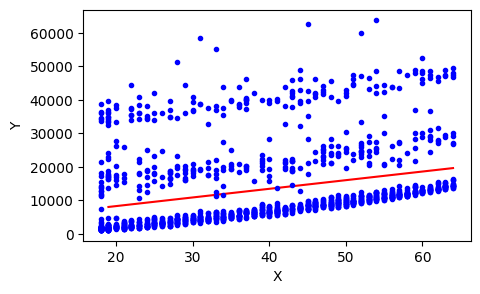

In [ ]:
plt.figure(figsize = (5, 3))
plt.plot(x_new, y_hat, "-r")
plt.plot(x, y, "b.")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 3.경사하강법

(1) 경사하강법(Gradient Descent)은 함수의 값이 낮아지는 방향으로 독립변수의 값을 바꿔가면서 최종적으로 최소 함숫값을 갖도록 하는 독립변수의 값을 찾는 방식이다. 최적의 해를 찾는 최적화 알고리즘으로서, 함수를 최소화하기 위해 파라미터를 반복적으로 조정해나간다.

머신러닝에서 경사하강법을 사용하는 이유는 두 가지이다. 첫째로, 분석에서 마주하는 함수들은 형태가 보갑해 수식으로 미분 계수와 그 해를 찾기 어려울 수 있다. 둘째로, 데이터의 양이 큰 경우 경사하강법이 상대적으로 쉽게 구현된다.

Random Initalization(무작위 초기화)를 통해 임의의 값으로 시작해 함수의 값이 감소하는 방향으로 최솟값에 수렴할 때까지 점진적으로 진행한다. 이때 학습 스텝의 크기를 learning rate라고 한다.

(2) 경사하강법의 종류

- 배치 경사하강법

  - 반복 시 전체 훈련세트를 사용해 가중값을 갱신한다.
  - 특징: 계산량이 많아 소요시간이 증가한다. But 학습 시 발생하는 잡음이 적은 최적치를 찾을 수 있다.

- 확률적 경사하강법

  - 한 개의 샘플데이터를 무작위로 선택하고 그 샘플에 대한 경사를 계산한다. 매 반복마다 가중값이 달라지기 때문에 비용함수가 최솟값에 접근할 때 확률값으로 요동치며 평균적으로 감소한다.
  - 특징: 최솟값에 요동치며 접근하기 때문에 최적치가 아닐 수 있다. But 지역 최솟값을 건너뛰고 전역 최솟값으로 다다를 가능성이 높고, 계산 속도가 빠르다

- 미니 배치 경사하강법

  - 각 스텝을 반복할 때 임의의 30~50개 관측값으로 경사를 계산하고 모델의 가중값을 갱신한다.
  - 특징: 확률적 경사하강법보다 지역 최솟값에서 빠져나오기 어려울 수도 있다. But 낮은 오차율을 가지므로 최솟값에 더 가까이 도달할 수 있다.


(3) scikit-learn의 SGDRegressor

sklean 패키지로 걍사하강법을 활용한 선형 회귀 모델을 학습할 수 있다. 그중 SGDRegressor은 확률적 경사하강법 회귀 모델을 구현한다.

정규화는 norm L2, norm L1 또는 이 둘의 조합(elastic net)을 이용해 매개변수를 0벡터로 축소하는 손실 함수에 추가된 패널티이다.

- 코드 구현

보험 가입자 데이터를 활용한다.

fit에 입력되는 데이터는 2차원 array여야 하므로 reshape 할 것.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor

data = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv")

In [ ]:
x = np.array(data['age'])
y = np.array(data['charges'])
print(x.shape, y.shape)

(1338,) (1338,)


In [ ]:
x = x.reshape(1338, 1)
y = y.reshape(1338, 1)

In [ ]:
y.ravel()
''' 다차원 배열을 1차원 배열로 평평하게(flatten) 만들어주는 함수
 원본과 메모리를 공유하므로
 복사본이 필요할 경우에는 np.flatten() '''

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
sgd_reg = SGDRegressor(max_iter = 1000, random_state = 56)
sgd_reg.fit(x, y.ravel())
print("절편:", np.round(sgd_reg.intercept_, 3), ", 계수:", np.round(sgd_reg.coef_, 3))

절편: [-541.315] , 계수: [371.583]


In [ ]:
x_new = [[19], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[ 6518.76812781 23240.01686012]


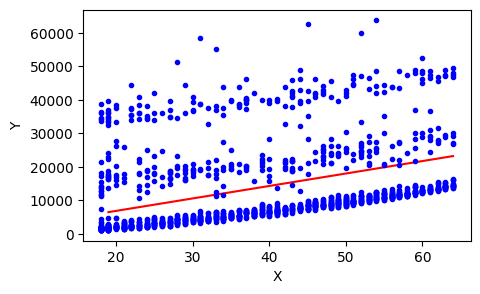

In [ ]:
plt.figure(figsize = (5, 3))
plt.plot(x_new, y_hat, "-r")
plt.plot(x, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Section 2. 다항 회귀(Polynomial Regression)

## 1.개념

데이터가 비선형의 형태를 갖고 있을 때 확장된 특성을 데이터세트에 선형 모델로 훈련시키는 기법을 다항 회귀라고 한다.

(1) 다항변수 생성
  
  scikit-learn의 PolynomialFeatures(degree=d)를 활용해 변수특성을 거듭제곱으로 변환한다. 이때 **주어진 차수까지 변수 간의 모든 교차항을 추가**하기 때문에, 설명변수가 여러개일 때 다항회귀는 일반적인 선형회귀와 달리 변수들 사이 관계를 찾을 수 있다.
  
  하지만 **과대적합의 위험**이 있다.

(2) 선형결합

  PolynimialFeatures로 생성한 변수들은 LinearRegression()의 입력값으로 대입하면 다항회귀 분석을 수행할 수 있다.

## 2.scikit-learn의 PolynomialFeatures

다항 변수를 생성하는 함수이다. 다항회귀는 다항변수를 생성한 뒤 LinearRegression() 함수에 적용하면 된다.

(1) 다항회귀 분석

  캐글의 80가지 시리얼 영양소 평가데이터

In [ ]:
import pandas as pd

cereal = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv")
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


필요한 데이터만 추출하기 위해 전처리를 진행한다. 설탕 함유량이 0 이상인 데이터만 추출한다.

In [ ]:
cereal = cereal[cereal.columns[3:]] # 필요없는 문자형 변수 제거
cereal = cereal[cereal.sugars >= 0]
cereal.head(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


<ipython-input-23-cb1ab823a71f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by = ['sugars'], inplace = True)


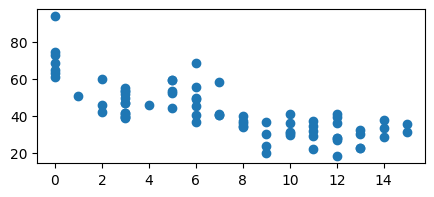

In [ ]:
# sugars에 따른 rating 예측하기

import matplotlib.pyplot as plt
plt.figure(figsize = (5, 2))
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by = ['sugars'], inplace = True)
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(x, y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 56)
print('train set:', X_train.shape, y_train.shape)
print('test set:', X_test.shape, y_test.shape)

train set: (53,) (53,)
test set: (23,) (23,)


PolynomialFeatures로 2차 다항식 조건 생성한 후 fit_transform() 메서드로 X_poly 데이터를 생성한다.

X_poly는 **교차항, 2차항** 데이터로 변환된다.

In [ ]:
# PolynomialFeatures로 2차 다항식 조건 생성한 후 fit_transform() 메서드로 X_poly 데이터를 생성한다.

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) # 2차항 조건 생성
X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1)) # x가 벡터니까 행렬로 변환 후 적용 (53, 1)
print(X_poly.shape) # bias, 1차, 2차

(53, 3)


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 모델 학습
reg = LinearRegression()
reg.fit(X_poly, y_train) # X는 변환, y는 기존

# test set 2차항으로 변환
X_test_poly = poly_reg.transform(X_test.reshape(-1, 1))
pred = reg.predict(X_test_poly) # 회귀모델 예측값

np.set_printoptions(precision = 2) # 소수점 둘째자리까지 표현
print( np.concatenate((pred.reshape(len(pred), 1),
                      y_test.reshape(len(y_test), 1)), axis = 1) ) # 예측값과 실제값 비교

[[44.06 45.33]
 [52.04 41.5 ]
 [58.23 50.76]
 [52.04 40.56]
 [55.04 45.86]
 [37.67 19.82]
 [31.6  30.31]
 [39.62 36.19]
 [61.59 68.24]
 [46.54 52.08]
 [61.59 72.8 ]
 [32.85 18.04]
 [34.28 21.87]
 [35.89 40.92]
 [37.67 29.92]
 [35.89 29.51]
 [41.75 40.4 ]
 [61.59 64.53]
 [39.62 37.04]
 [61.59 93.7 ]
 [46.54 44.33]
 [32.85 26.73]
 [52.04 41.45]]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(X_test_poly, y_test)
print(f'MSE: {mse:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}, ACC: {acc*100:.3f}%')

MSE: 113.864, MAE: 113.864, RMSE: 10.671, ACC: 63.657%


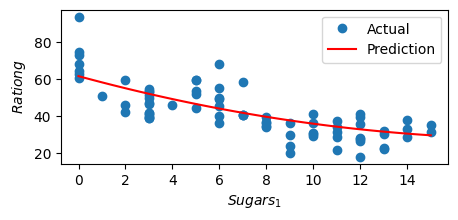

In [ ]:
X_new = np.linspace(0, 15, 100).reshape(100, 1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.figure(figsize = (5, 2))
plt.plot(x, y, 'o', label = 'Actual')
plt.plot(X_new, y_new, 'r-', label = 'Prediction')
plt.legend(loc = 'upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rationg$')
plt.show() # 아래로 볼록한 다항 회귀선 그려짐

(2) 고차 다항 회귀분석


In [ ]:
X = cereal.iloc[:, :-1].values # (76, 12)
y = cereal.iloc[:, -1].values # (76,)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 56)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(X_test_poly, y_test)
print(f'mse: {mse:.3f}, mae: {mae:.3f}, rmse: {rmse:.3f}, acc: {acc*100:.3f}%') # 앞서 수행한 다항회귀보다 성능 향상됨

mse: 14.000, mae: 2.299, rmse: 3.742, acc: 94.939%


# Section 3. 다중 회귀(Multiple Regression)

## 1.개념
여러 개의 독립변수가 복합적으로 종속변수에 영향을 미치는 회귀분석을 말한다. 모델이 복잡해지면 과대적합이 발생할 가능성이 있어 다양한 규제를 적용해 모델의 가중치를 제한한다.

### (1)변수 선택법

1. 규제가 있는 다중 회귀 모델 --> 라쏘, 릿지, 엘라스틱넷
  
  변수선택법의 대안으로 계수 추정치들을 제한하거나 규칙화하는 기법으로 **p개의 독립변수를 모두 포함**할 수 있다.

  규칙에 따라 계수 추정치들을 0으로 수축하는 방식으로 다중회귀 모델의 성능을 높인다.

#### 릿지(Ridge) : L2 패널티

릿지 회귀는 최소제곱 적합식의 수축 패널티라 불리는 항에 L2 패널티를 추가한 것이다.

**RidgeMSE = MSE(β)+λ(1/2)Σβ^2**

식의 앞 부분은 다중 선형 회귀에서의 최소제곱법(OLS)과 동일하다.

수축 패널티인 두 번째 항 λ(1/2)Σβ^2이 기울기를 제어하는 패널티 부분이다. 파라미터의 제곱을 더해준 값이므로 미분이 가능하여 Gradient descent 최적화가 가능하고, 파라미터의 크기가 작은 것보다 큰 것을 더 빠른 속도로 줄여준다.

-> 즉, λ가 크면 클수록 릿지 회귀의 계수 추정치가 0에 가까워지는 것이다. (λ=0이면 선형회귀와 같음)

-> = 데이터의 평균을 지나는 선을 만든다.


릿지 회귀가 최소제곱법보다 나은 이유는 편향-분산 트레이드오프 때문이다. λ가 증가하면 릿지회귀 적합의 유연성이 줄어들어 편향은 증가하지만 분산은 감소한다. 그러므로 학습데이터의 작은 변화에 회귀계수 추정치가 크게 변하는 것을 막아준다. 또한 2^p개의 모델을 탐색해야 하는 변수선택법에 비해 계산이 빠르다.

In [ ]:
# λ에 따른 회귀계수 변화 시각화 하기 (모델에서 λ=alpha)

from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target

In [ ]:
# ridge의 alpha값에 따라 다르게 설정되는 릿지 계수를 데이터프레임에 저장하여 df_ridge
from sklearn.linear_model import Ridge

alpha_range = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha_range):
    ridge = Ridge(alpha = a, random_state = 56)
    ridge.fit(x, y)
    data.append( pd.Series(np.hstack([ridge.coef_])) )

df_ridge = pd.DataFrame(data, index = alpha_range)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


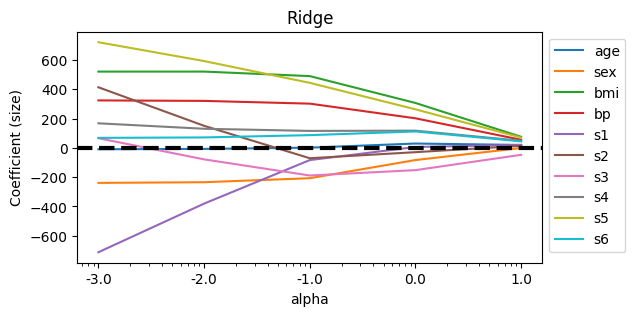

In [ ]:
plt.figure(figsize=(6,3))
plt.semilogx(df_ridge)
plt.xticks(alpha_range, labels = np.log10(alpha_range))
plt.legend(labels = df_ridge.columns, bbox_to_anchor = (1,1))
plt.title('Ridge'); plt.xlabel('alpha'); plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

# λ=alpha가 증가할수록 회귀계수 값이 점점 0에 수렴!
# + MSE를 사용한 회귀모델은 λ=0일 때와 같으며,
# λ가 작은 릿지회귀의 회귀계수는 MSE를 사용한 회귀 계수와 비슷하다.
# λ값이 점점 증가하며 회귀계수가 0에 가까워진다.

#### 라쏘(Lasso) : L1 패널티

릿지회귀는 최종 모델에 p개 변수를 모두 포함한다. RidgeMSE의 수축 패널티 항은 모든 계수를 0으로 수렴시키지만 어떤 것도 0으로 만들지는 않는다. 만약 변수 수(p)가 매우 많은 데이터로 릿지 모델을 피팅하면 결과해석이 어렵다.


이러한 점을 해결하기 위해 라쏘 회귀가 사용된다.

**라쏘 회귀는 최소제곱 적합식의 수축패널티라 불리는 항에 L1 패널티를 추가한 것이다.**




**LassoMSE(β) = MSE(β) + λΣ|βᵢ|**

수축 패널티는 두 번째 항이다. 이 항은 β1,..,βn이 0에 가까울 때 작기 때문에, βᵢ의 추정치를 0으로 수축하는 효과를 준다.

다만, L1 패널티는 하이퍼 파라미터 λ가 충분히 클 때, 계수 추정치들의 일부를 0이 되게 한다.

=> **덜 중요한 특징은 특성의 가중치를 제거할 수 있다는 점이 릿지와의 차이이다.**

=> 즉, 라쏘회귀는 회소모델(sparse model)을 만들 수 있다.

In [ ]:
# λ에 따른 회귀계수 변화 시각화 하기
import numpy as np
from sklearn.linear_model import Lasso
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha) :
    lasso = Lasso(alpha = a, random_state = 56)
    lasso.fit(x, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index = alpha)
df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


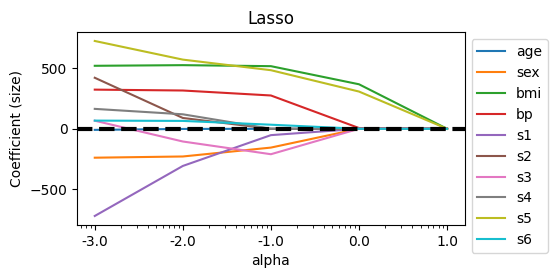

In [ ]:
# λ 값이 증가하면서 회귀계수가 0에 도달하는지 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 2.5))
plt.semilogx(df_lasso)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_lasso.columns, bbox_to_anchor = (1,1))
plt.title("Lasso") ; plt.xlabel("alpha") ; plt.ylabel("Coefficient (size)")
plt.axhline(y = 0, linestyle = '--', color = 'black', linewidth = 3)

''' λ값이 증가하면서 회귀계수 값이 점점 0가 되는 것을 확인할 수 있다.
그래프를 보면 규제가 강한 라쏘(λ값이 1에 가까운)에서는 'bmi'와 's5'만 포함하는 모델이 관찰된다. => 다른 변수는 계수가 0이돼서
logλ가 -1에 가까울 때는 bmi, s5, bp, s3, sex, s1 변수가 포함되는 모델이 생성되는 것을 알 수 있다. '''

MSE를 사용한 회귀 모델은 λ=0일 때와 같다. λ가 작은 라쏘 회귀모델의 회귀계수는 MSE를 사용한 회귀 모델의 계수와 비슷한 사이즈를 지닌다.

λ값이 점점 증가하면서 회귀계수가 0이 된다.

**릿지회귀는 λ=10일 때 회귀계수가 0에 가까운 형태를 보이지만 0은 아니었다. 하지만 라쏘는 λ=10일 때 회귀계수가 0이된다.**

#### 엘라스틱넷(ElasticNet) : L1+L2

엘라스틱넷은 릿지와 라쏘를 절충한 알고리즘이다. 수축 패널티는 릿지와 회귀의 규제항을 단순히 더한 것이며, 혼합비율 r을 사용해 조절한다.

**r=0이면 릿지회귀와 같고, r=1이면 라쏘회귀와 같다**

**ElasticNetMSE = MSE(β) + rλΣ|βᵢ| + (1-r)/2⋅λΣβ^2**

In [ ]:
from sklearn.linear_model import ElasticNet
import numpy as np
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ela = ElasticNet(alpha = a, l1_ratio = 0.5, random_state = 56)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data, index = alpha)
df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


" λ값이 증가하면서 회귀계수 값이 점점 0가 되는 것을 확인할 수 있다.\n그래프를 보면 규제가 강한 라쏘(λ값이 1에 가까운)에서는 'bmi'와 's5'만 포함하는 모델이 관찰된다. => 다른 변수는 계수가 0이돼서\nlogλ가 -1에 가까울 때는 bmi, s5, bp, s3, sex, s1 변수가 포함되는 모델이 생성되는 것을 알 수 있다. "

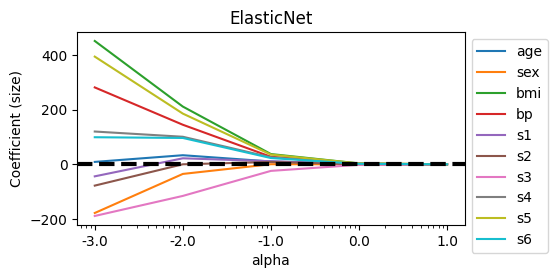

In [ ]:
# λ 값이 증가하면서 회귀계수가 0에 수렴하는지 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 2.5))
plt.semilogx(df_ela)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_ela.columns, bbox_to_anchor = (1,1))
plt.title("ElasticNet") ; plt.xlabel("alpha") ; plt.ylabel("Coefficient (size)")
plt.axhline(y = 0, linestyle = '--', color = 'black', linewidth = 3)

''' λ값이 증가하면서 회귀계수 값이 점점 0가 되는 것을 확인할 수 있다.
+ MSE를 사용한 회귀모델은 λ=0일 때와 같다. λ가 작은 엘라스틱넷 모델의 회귀계수는 MSE를 사용한 회귀 모델의 계수와 비슷한 사이즈를 지닌다.
λ값이 점점 증가할수록 회귀계수가 0이 된다. 엘라스틱넷은 λ=10일 때 회귀계수가 0이 된다. '''

# Section 4. 로지스틱 회귀(Logistic Regression)

## 1.개념
반응변수가 범주형인 경우 적용하는 회귀분석을 로지스틱 회귀분석이라 한다.

로지스틱은 반응변수 Y를 직접 모델링하지 않고, Y가 특정 클래스에 속하는 확률을 모델링한다. 예를 들면 누군가의 카드대금이 주어졌을 때 그 사람이 카드대금을 연체할 확률을 구하는 것이다.

Pr(연체=Yes|잔고)

### (1) p(x)와 X사이의 모델링

로지스틱 회귀는 선형모델링처럼 독립변수의 가중치 합으로 계산해 P(X)와 X 사이의 관계를 나타낸다. 다만, 특정 범주에 속하는 확률을 나타내므로 모든 X값에 대해서 0~1 사이에 값을 갖는 함수를 사용해야한다.

X가 아주 큰 음수일 때 0이 되고, X가 아주 큰 양수일 때 1이 되도록 바꾸려면 **시그모이드 함수**를 사용한다.

**Y = 1/(1+e^(-x))**

###(2) 승산비(Odds)

Odds는 '실패에 비해 성공할 확률'을 의미한다. 성공확률을 p라 할 때 Odds = p/(1-p)

=> Odds = P(x)/(1-P(X))

이때, P(Y=1|X)값이 1에 가까워질수록 Odds가 무한대로 발산하기 때문에, 로그함수를 취하게 된다.

그러면 log(Odds)는 범위가 -inf<log(Odds)<inf가 된다. 또한 X가 음수일 때는 Y가 0에서 0.5이하인 값을, X가 양수일 땐 Y가 0.5이상이면 1이하 값을 반환하게 된다.

즉, 이러한 성질을 이용해 설명변수에 로짓을 적용해서 모델링 하는 것이 로지스틱 회귀이다.



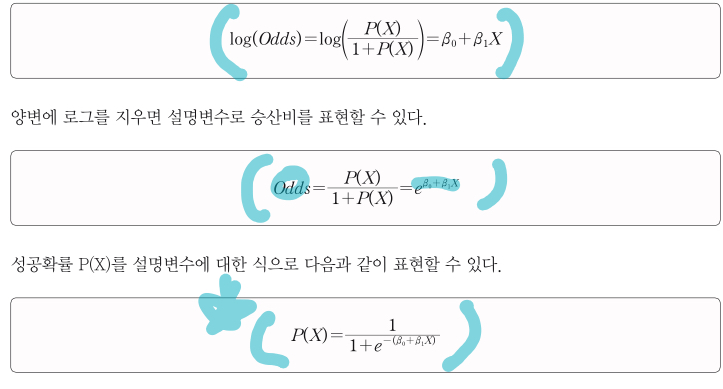

이 과정을 통해 로지스틱회귀모델은 설명변수 X에 대해 선형적인 로짓을 가진다고 한다.

해석 -> ex. 카드대금 연체할 확률이 1/3이고 대금 완납할 확률이 2/3이면 연체odds는 1/2. 이때 odds는 신용카드 내역 3번 중 2번 완납하고 1번 연체한다고 해석한다.

승산비가 높으면 연체확률이 증가하고 승산비가 낮으면 연체확률이 낮아진다.
이때, P(X)랑 X가 선형이 아니므로
**X에 속할수록 Y를 할 확률이 exp(β) 배 증가한다**

### (4) scikit-learn의 LogisticRegression

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv")
body.head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C


In [2]:
# gender는 np.where 사용해서 binary로 바꿔주기
body['gender'] = np.where(body['gender'] == 'M', 0, 1) # M이면 0, 아니면 1
body['class_1'] = np.where(body['class'] == 'A', 1, 0) # A면 1, 아니면 0

In [3]:
from sklearn.model_selection import train_test_split

feature_col = list(body.columns.difference(['class', 'class_1'])) # 'class', 'class_1' 제외한 변수명 추출
x = body[feature_col]
y = body['class_1']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 56)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [4]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state = 56)
logit.fit(train_x, train_y)

LogisticRegression(random_state=56)

In [5]:
# 로지스틱 회귀 그래프 그리기

proba = pd.DataFrame(logit.predict_proba(train_x)) # 클래스 0(Not A)에 속할 확률, 1(A)에 속할 확률
cs = pd.DataFrame(logit.decision_function(train_x)) # 해당 값이 x=0인 Hyperplane을 기준으로 양수/음수에 위치하는지와, 얼마큼 멀리 떨어져있는지 나타냄

df = pd.concat([proba, cs], axis = 1)
df.columns = ['p(Not A)', 'p(A)', 'decision_func']
df.head(3)

,p(Not A),p(A),decision_func
0,0.620448,0.379552,-0.491448
1,0.995117,0.004883,-5.317128
2,0.349833,0.650167,0.619774


In [6]:
df.sort_values(['decision_func'], inplace = True)
df.reset_index(inplace = True, drop = True)
df.head(3)

,p(Not A),p(A),decision_func
0,1.0,3.072062e-08,-17.298332
1,1.0,5.878396e-08,-16.649397
2,1.0,2.071011e-07,-15.390058


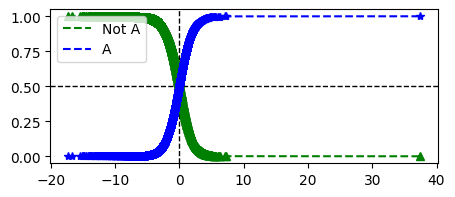

In [8]:
# Confidence Score에 따른 클래스 확률값을 매칭시키면 A 클래스에 속할 추정확률과 결정경계(파란선) 얻을 수 있음
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 2))
plt.axhline(y = 0.5, linestyle = '--', color = 'black', linewidth = 1)
plt.axvline(x = 0, linestyle = '--', color = 'black', linewidth = 1)

plt.plot(df['decision_func'], df['p(Not A)'], 'g--', label = 'Not A')
plt.plot(df['decision_func'], df['p(Not A)'], 'g^')
plt.plot(df['decision_func'], df['p(A)'], 'b--', label = 'A')
plt.plot(df['decision_func'], df['p(A)'], 'b*')

plt.xlabel; plt.ylabel
plt.legend(loc='upper left')
plt.show()

In [10]:
# 성능평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logit.predict(test_x)
cm = confusion_matrix(test_y, pred)
acc = accuracy_score(test_y, pred)
prc = precision_score(test_y, pred)
rcll = recall_score(test_y, pred)
f1 = f1_score(test_y, pred)

print(cm)
print()
print(f'정확도: {acc*100:.3f}%')
print(f'정밀도: {prc*100:.3f}%')
print(f'재현율: {rcll*100:.3f}%')
print(f'F1: {f1*100:.3f}%')

[[2758  256]
 [ 361  643]]

정확도: 84.644%
정밀도: 71.524%
재현율: 64.044%
F1: 67.578%


<Figure size 200x200 with 0 Axes>

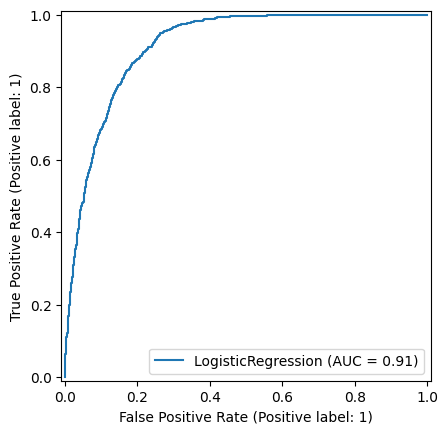

In [13]:
# ROC curve, AUC 시각화
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(2,2))
RocCurveDisplay.from_estimator(logit, test_x, test_y)
plt.show()

## 소프트맥스 회귀 - 다중 클래스 분류

### (1) 개념

다중 클래스 분류 모델을 다항로지스틱 회귀(multinomial) or 소프트맥스 회귀(softmax)라 한다. 소프트맥스 함수는 클래스의 총 개수를 k개라고 할 때 k차원의 벡터를 입력받아 각 클래스에 대한 점수 Sₖ(X)를 계산하고, 그 점수에 소프트맥수 함수를 적용해 각 클래스의 확률을 추정한다.

### (2) scikit-learn의 LogisticRegression 활용한 소프트맥스 회귀

In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
body = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv")
body.head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C


In [18]:
# gender, class 변수 전처리
body['gender'] = np.where(body['gender'] == 'M', 0, 1)

mapping = {'A':0, 'B':1, 'C':2, 'D':3}
body['class_2'] = body['class'].map(mapping)
body.head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2


In [25]:
from sklearn.model_selection import train_test_split
feature_col = list(body.columns.difference(['class', 'class_2']))
x = body[feature_col]
y = body['class_2']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 56)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [26]:
from sklearn.linear_model import LogisticRegression

softm = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10, random_state = 56)
softm.fit(train_x, train_y)

LogisticRegression(C=10, multi_class='multinomial', random_state=56)

- solver: 최적화 알고리즘 지정
    
  - 'lbfgs' (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)

    2차 미분을 사용하는 알고리즘으로, 작거나 중간 규모의 데이터에서 효율적. 다중클래스에서도 잘 작동
  - 'newton-cg'
  
    lbfgs와 비슷하게 2차 미분 기반이지만, Newton-CG 방법 사용. 다중 클래스 문제에서도 잘 작동

  - 'liblinear'
    
    작은 데이터셋에서 빠르게 작동하는 선형 분류기를 위한 알고리즘. 이진 분류에 적합. 다중 클래스 문제에서는 일대다(OvR) 방식으로 처리됨.

  - 'sag'
  
    확률적 평균 경사 하강법을 사용하여 큰 데이터셋에 효율적. 특히 희소한 데이터를 처리하는 데 적합

  - 'saga'

    ElasticNet과 같은 정규화 기법을 지원. 큰 데이터셋에 적합. 희소 행렬을 처리할 때 효과적.



- C: 규제 강도를 조절하는 하이퍼파라미터. 규제는 과적합을 방지하기 위한 방법이며, L2 정규화가 기본적으로 적용됨.

  C 값이 클수록 규제가 약해짐 -> overfitting 위험 증가

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred = softm.predict(test_x)

cm = confusion_matrix(test_y, pred)
acc = accuracy_score(test_y, pred)

print(cm)
print()
print(f'정확도: {acc*100:.3f}%')

[[727 247  29   1]
 [261 402 314  27]
 [ 99 199 511 196]
 [ 21  48 172 764]]

정확도: 59.831%


In [34]:
softm.predict([test_x.iloc[-1,:]])
# 마지막행 데이터 예측 결과 -> 1로 속할 것으로 예측

array([1])

In [35]:
softm.predict_proba([test_x.iloc[-1,:]])
# 클래스 0에 속할 확률: 29.77%
# 클래스 1에 속할 확률: 36.36% ...~

array([[0.29777917, 0.36364333, 0.26159536, 0.07698214]])

In [47]:
test_y[-1:] # 실제로는 3에 해당

,class_2
3237,3
